# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from Kaggle

## Setup

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Data information

In [2]:
df = pd.read_csv('../../data/911.csv')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636035 entries, 0 to 636034
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        636035 non-null  float64
 1   lng        636035 non-null  float64
 2   desc       636035 non-null  object 
 3   zip        558757 non-null  float64
 4   title      636035 non-null  object 
 5   timeStamp  636035 non-null  object 
 6   twp        635762 non-null  object 
 7   addr       636035 non-null  object 
 8   e          636035 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 43.7+ MB


# Basic Questions

### What are the top 5 zipcodes for 911 calls?

In [4]:
df['zip'].value_counts().head(5)

19401.0    43491
19464.0    41890
19403.0    33395
19446.0    30891
19406.0    21528
Name: zip, dtype: int64

### What are the top 5 townships for 911 calls?

In [5]:
df['twp'].value_counts().head(5)

LOWER MERION    53412
ABINGTON        38348
NORRISTOWN      35861
UPPER MERION    34624
CHELTENHAM      29344
Name: twp, dtype: int64

### Take a look at the 'title'column, how many unique title codes are there?

In [6]:
df['title'].nunique()

147

In [7]:
len(df['title'].unique())

147

# Creating new features

In the titles column there are "Reasons/Departaments" specified before the title code. These are EMS, Fire and Traffic. Use .apply() with a custom lambda expresson to create a new column called "Reason" that contains this string value.

Example: 'EMS: BACK PAINS/INJURY', Reason: 'EMS'

In [8]:
def get_reason(title):
    reason = title.split(':')
    return reason[0]

In [9]:
# df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])
df['Reason'] = df['title'].apply(lambda x: get_reason(x))

In [10]:
df['Reason'].head(5)

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: Reason, dtype: object

### What is the most common Reason for 911 calls based off of this new column?

In [11]:
df['Reason'].value_counts()

EMS        318100
Traffic    222479
Fire        95456
Name: Reason, dtype: int64

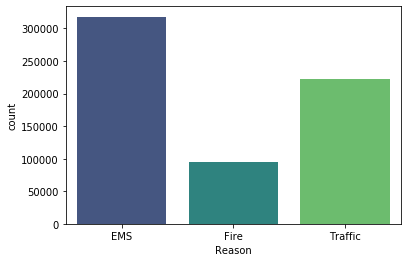

In [12]:
sns.countplot(x='Reason', data=df, palette='viridis')

## Datetime

### What the type of the objects in the timeStamp column? Convert to datetime

In [13]:
type(df['timeStamp'][0]), df['timeStamp'][0]

(str, '2015-12-10 17:10:52')

In [14]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [15]:
type(df['timeStamp'][0]), df['timeStamp'][0]

(pandas._libs.tslibs.timestamps.Timestamp, Timestamp('2015-12-10 17:10:52'))

In [16]:
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [17]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,12,3


### Use the .map() with a day of week dict to map the actual string names of the day of week

In [18]:
dmap = {
    0:'Mon',
    1:'Tue',
    2:'Wed',
    3:'Thu',
    4:'Fri',
    5:'Sat',
    6:'Sun'
}

In [19]:
df['Day of Week'] = df['Day of Week'].map(dmap)

In [20]:
df['Day of Week']

0         Thu
1         Thu
2         Thu
3         Thu
4         Thu
         ... 
636030    Wed
636031    Wed
636032    Wed
636033    Wed
636034    Wed
Name: Day of Week, Length: 636035, dtype: object

### Use seaborn to create a countplot of the Dat of Week column with the hue based off of the Reason Column

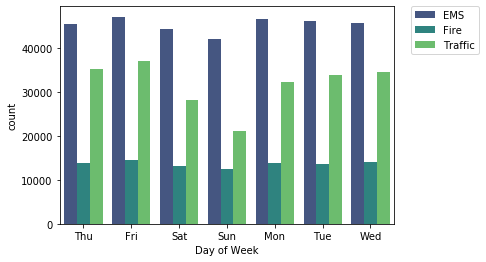

In [21]:
sns.countplot(x='Day of Week', data=df, hue='Reason', palette='viridis')
# Realocate the legend to outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

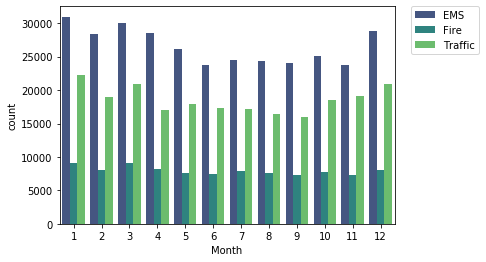

In [22]:
sns.countplot(x='Month', data=df, hue='Reason', palette='viridis')
# Realocate the legend to outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### New feature: Date

In [23]:
df['Date'] = df['timeStamp'].apply(lambda tm: tm.date())

In [24]:
df['Date']

0         2015-12-10
1         2015-12-10
2         2015-12-10
3         2015-12-10
4         2015-12-10
             ...    
636030    2020-05-13
636031    2020-05-13
636032    2020-05-13
636033    2020-05-13
636034    2020-05-13
Name: Date, Length: 636035, dtype: object

### Groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.

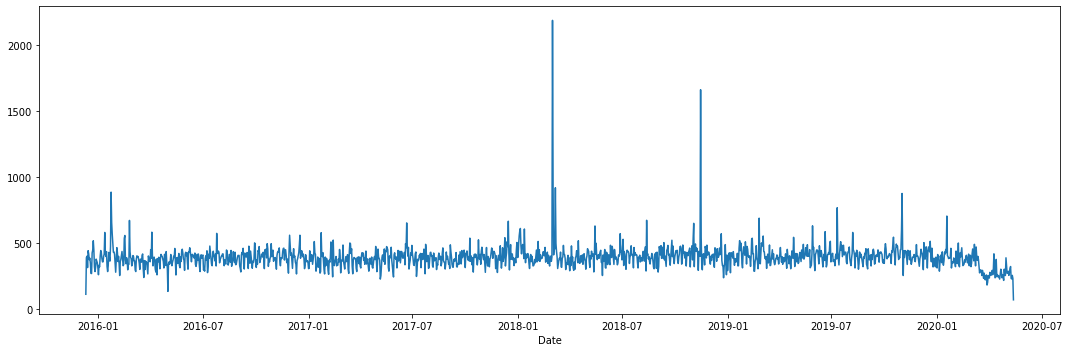

In [25]:
df.groupby('Date').count()['lat'].plot(figsize=(15,5))
plt.tight_layout()

### Plots for each Reason

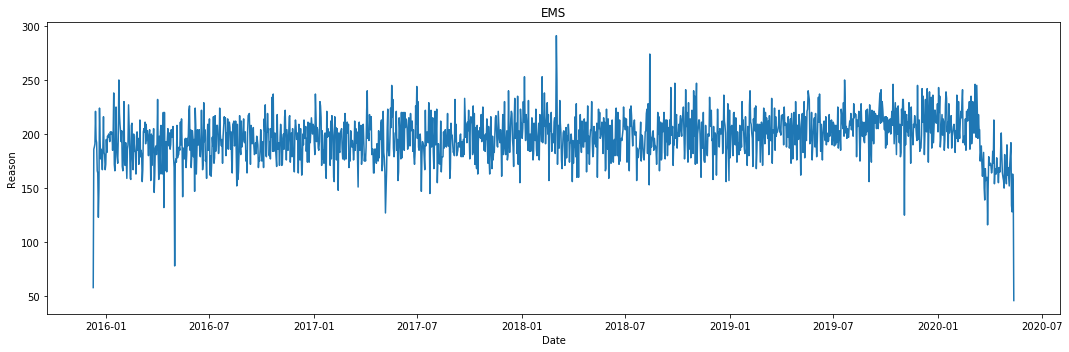

In [26]:
df[df['Reason'] == 'EMS'].groupby('Date').count()['lat'].plot(figsize=(15,5))
plt.title('EMS')
plt.xlabel('Date')
plt.ylabel('Reason')
plt.tight_layout()

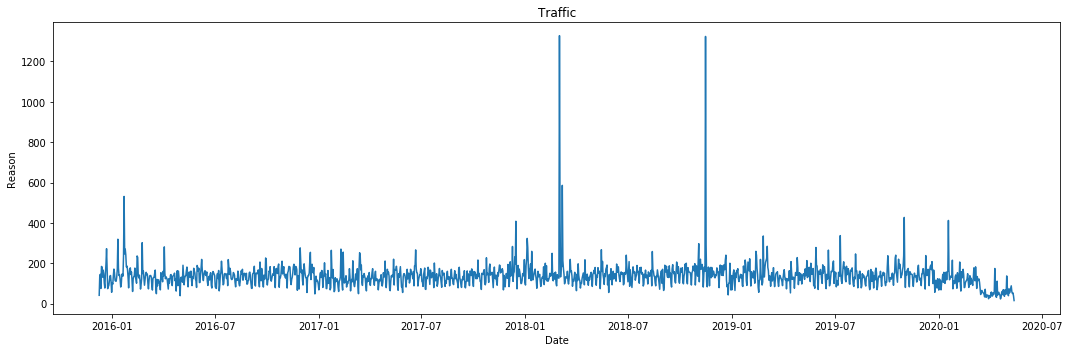

In [27]:
df[df['Reason'] == 'Traffic'].groupby('Date').count()['lat'].plot(figsize=(15,5))
plt.title('Traffic')
plt.xlabel('Date')
plt.ylabel('Reason')
plt.tight_layout()

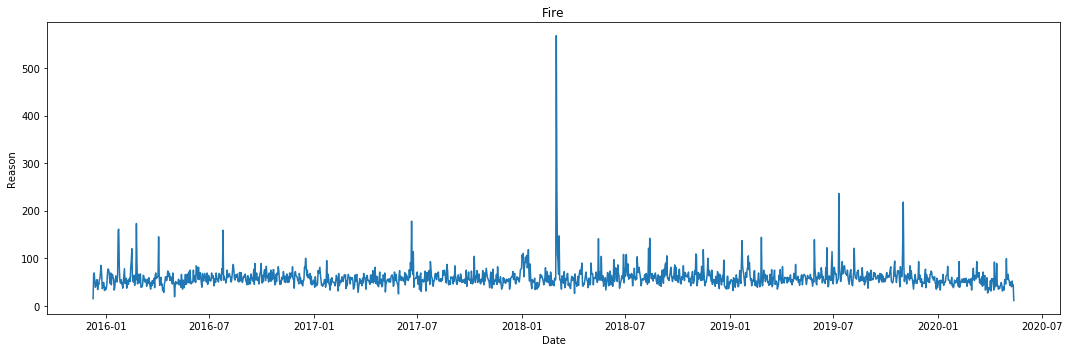

In [28]:
df[df['Reason'] == 'Fire'].groupby('Date').count()['lat'].plot(figsize=(15,5))
plt.title('Fire')
plt.xlabel('Date')
plt.ylabel('Reason')
plt.tight_layout()

## Heatmaps

In [29]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)

In [34]:
dayHour = df.groupby(by=['Day of Week', 'Hour']).count()['lat'].unstack()

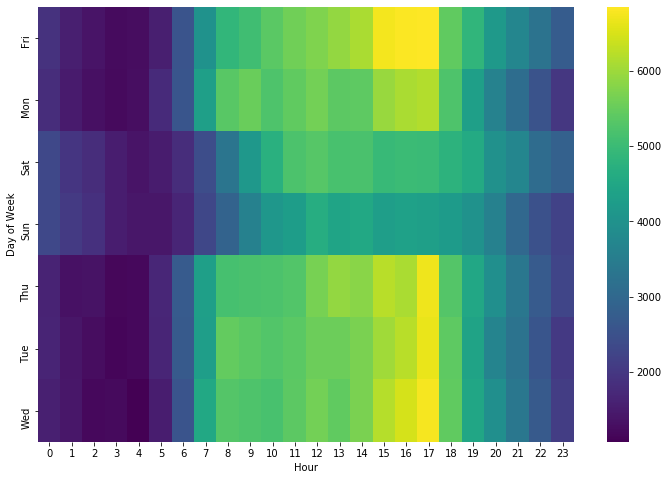

In [47]:
plt.figure(figsize=(12,8))
sns.heatmap(dayHour, cmap='viridis')

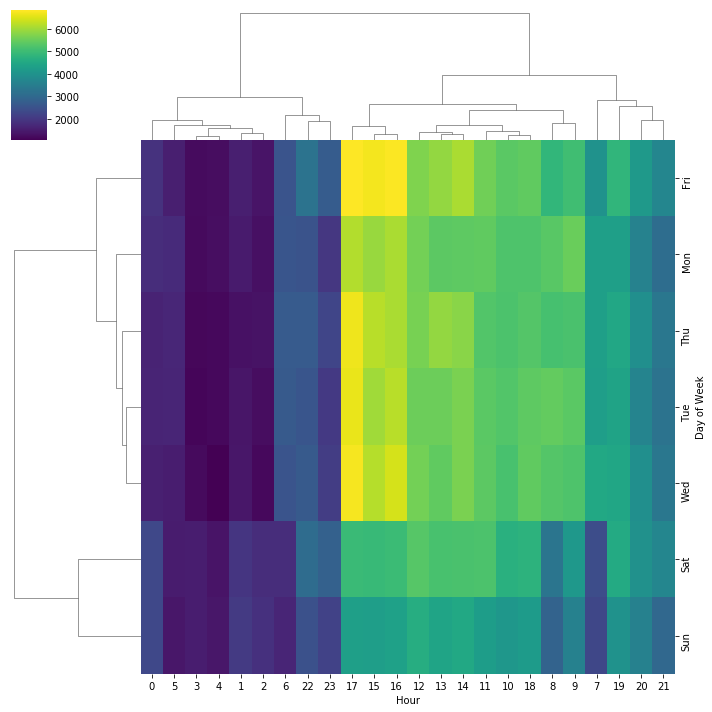

In [49]:
sns.clustermap(dayHour, cmap='viridis ')

In [51]:
dayMonth = df.groupby(by=['Day of Week', 'Month']).count()['lat'].unstack()
dayMonth

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Fri,9309,8255,10941,7997,7867,7647,7103,7336,7694,6934,8379,9305
Mon,8896,8747,8060,8410,7291,6740,7929,6854,6598,8075,6722,8492
Sat,8475,7593,8050,7514,6302,6839,6395,6111,6566,6609,6773,8592
Sun,7478,6452,6766,6865,5914,5673,6567,5275,5956,6316,5196,7165
Thu,9055,7997,8849,7722,7832,7850,6964,7508,6954,7482,8358,8151
Tue,9714,8087,8372,7561,8326,6689,7637,7291,6601,7948,7344,8305
Wed,9409,8296,8989,7602,8292,7055,6976,7984,6844,7876,7410,7682


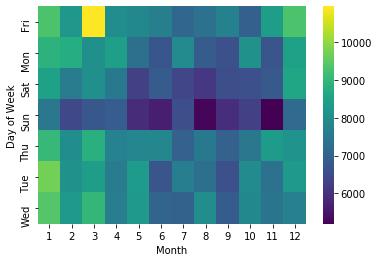

In [55]:
sns.heatmap(dayMonth, cmap='viridis')

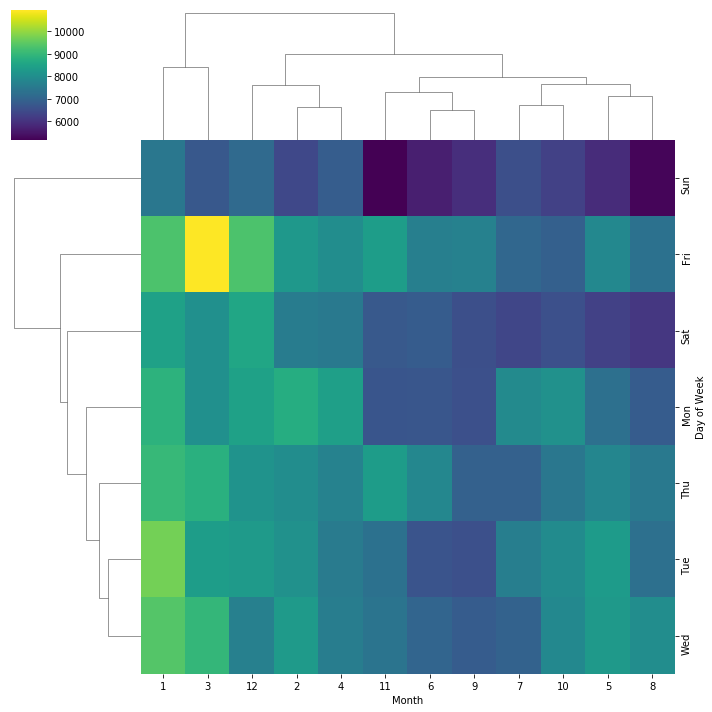

In [56]:
sns.clustermap(dayMonth, cmap='viridis')